# Descriptive title that follows notebook filename

**Notebook currently compatible with the `NCI`|`DEA Sandbox` environment only**

### General advice (delete this cell before submitting for review)

- When choosing a location for your analysis, **select an area that has data on both the `NCI` and `DEA Sandbox`** to allow your code to be run on both environments. 
For example, you can check this for Landsat using the [DEA Explorer](https://explorer.sandbox.dea.ga.gov.au/ga_ls5t_ard_3/1990) (use the drop-down menu to view all products). 
As of September 2019, the `DEA Sandbox` has a single year of continental Landsat data for 2015-16, and the full 1987-onward time-series for three locations (Perth WA, Brisbane QLD, and western NSW).
- When writing in Markdown cells, start each sentence is on a **new line**.
This makes it easy to see changes through git commits.
- Use Australian English in markdown cells and code comments.
- Use the [PEP8 standard](https://www.python.org/dev/peps/pep-0008/) for code. To make sure all code in the notebook is consistent, you can use the `jupyterlab_code_formatter` tool: select each code cell, then click `Edit` and then one of the `Apply X Formatter` options (`YAPF` or `Black` are recommended). This will reformat the code in the cell to a consistent style.
- In the final notebook cell, include a set of relevant tags which are used to build the DEA User Guide's [Tag Index](https://docs.dea.ga.gov.au/genindex.html). 
Use all lower-case, seperate words with spaces, and where possible re-use existing tags.
Ensure the tags cell below is in `Raw` format, rather than `Markdown` or `Code`.


### Background
An *optional* overview of the scientific, economic or environmental management issue or challenge being addressed by Digital Earth Australia. 
For `Beginners_Guide` or `Frequently_Used_Code` notebooks, this may include information about why the particular technique or approach is useful or required. 
If you need to cite a scientific paper or link to a website, use a persistent DOI link if possible and link in-text (e.g. [Dhu et al. 2017](https://doi.org/10.1080/20964471.2017.1402490)).

### Description
A _compulsory_ description of the notebook, including a brief overview of how Digital Earth Australia helps to address the problem set out above, and a run-down of the tools/methods being demonstrated below.


### Technical details
* **Products used:** `product_name`, `product_name`, `product_name`
* **Analyses used:** NDWI water index, geomedian compositing, pixel drill
* **Special requirements:** An _optional_ description of any special requirements, e.g. If running on the [NCI](https://nci.org.au/), ensure that `module load otps` is run prior to launching this notebook

## Cotton farms in Moree

Moree is a town in northern New South Wales, Australia. It is located on the banks of the May may River, in the centre of the Jim plains. Its name comes from an Aboriginal word for “rising sun”, “long spring”, or “water hole".

Moree is a major agricultural centre, noted for its part in the Australian cotton-growing industry which was established there in the early 1960s. The town is renowned by its healing artesian hot spring baths. At the 2016 census, the town of Moree had a population of 7,383. 

<img src="data/Moree_Satellite.png" alt="drawing" width="400" align="left"/>

Australia’s cotton growing season lasts approximately six months, starting in September/October (planting) and ending in March/April (picking). Irrigation water availability is a limiting factor in cotton production. Water-use efficiency has increased by approximately 240 percent since the 1970’s and Australian cotton growers are now recognised as the most water-use efficient in the world and three times more efficient than the global average. [Source: agriculture.gov.au](http://www.agriculture.gov.au)

The demand for cotton worldwide has been steadily increasing in recent years. The good quality of Australian cotton is recognised worldwide and constitutes an attractive product for farmers.

<figure>
  <img src="data/cotton_demand.jpg" alt="drawing" width="400" align="left"/>
  <figcaption>Evolution of worldwide cotton demand since year 2000. (Source: Abares)</figcaption>
</figure>

### Your task:

After many years working in an office you have decided to become a cotton farmer. You are looking for properties for sale near Moree but you have heard, at the local pub, about the big differences in productivity between lands. 

There are a couple of properties that fit your budget and you would like to find out which one has historically performed better in the past years. You cannot trust much the numbers that the previous owners are giving to you and want to find a more independent method to evaluate the differences. Luckily, in your previous job you had to use the DEA for very different purposes but you decide to give it a go at this problem.

You know the Fractional Cover product and you decide to use it for comparing the performance for these two properties, over the last growing season.

### Load packages

You start by loading the usual Python libraries to start working on this project.

In [1]:
%matplotlib inline

import datacube

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import xarray as xr

sys.path.append("../Scripts")
from dea_datahandling import load_ard

### Connect to the datacube
Give your datacube app a unique name that is consistent with the purpose of the notebook.

In [2]:
dc_moree = datacube.Datacube(app="Moree_CottonFarms")

### Analysis parameters

An *optional* section to inform the user of any parameters they'll need to configure to run the notebook:
* `param_name_1`: Simple description (e.g. `example_value`). Advice about appropriate values to choose for this parameter.
* `param_name_2`: Simple description (e.g. `example_value`). Advice about appropriate values to choose for this parameter.


In [99]:
y = -29.465833
x = 149.833889

query = {'lat': (-29.34, -29.42),
         'lon': (149.78, 149.91),
         'time':('2018-06-01', '2019-06-01')}

fc_data = dc_moree.load(product='ls8_fc_albers', **query)

# Cloud filtering functionality for FC is currently being developed so we manually filter cloudly images
fc_data = fc_data.isel(time=[0,2,4,5,6,7,9,10,11,12,13,16,19,20,22])

fc_data

<xarray.Dataset>
Dimensions:  (time: 15, x: 545, y: 426)
Coordinates:
  * time     (time) datetime64[ns] 2018-06-10T23:53:43 ... 2019-05-28T23:54:34.500000
  * y        (y) float64 -3.308e+06 -3.308e+06 ... -3.318e+06 -3.319e+06
  * x        (x) float64 1.7e+06 1.7e+06 1.7e+06 ... 1.713e+06 1.713e+06
Data variables:
    BS       (time, y, x) int16 69 69 68 67 67 68 67 67 ... 48 46 51 54 58 68 51
    PV       (time, y, x) int16 5 5 4 4 4 5 5 5 5 5 7 ... 32 13 1 2 0 0 2 5 5 5
    NPV      (time, y, x) int16 25 25 26 27 27 26 27 27 ... 48 53 48 43 35 26 42
    UE       (time, y, x) int16 11 11 11 11 11 11 11 11 ... 19 19 20 18 16 15 16
Attributes:
    crs:      EPSG:3577

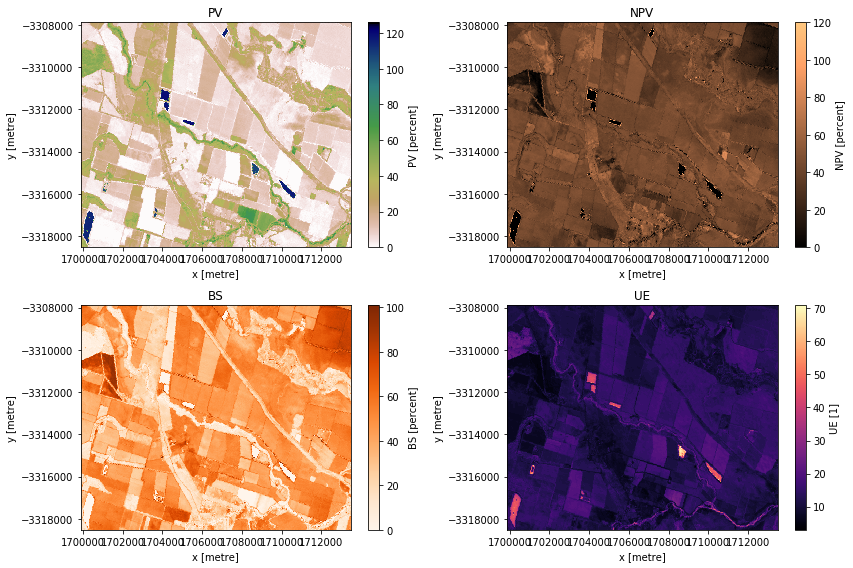

In [100]:
import matplotlib.gridspec as gridspec

def plot_fractions(ds, scene):
    #set up our images on a grid using gridspec
    plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(2,2) # set up a 2 x 2 grid of 4 images for better presentation

    ax1=plt.subplot(gs[0,0])
    ds.PV.isel(time=scene).plot(cmap='gist_earth_r')
    ax1.set_title('PV')

    ax2=plt.subplot(gs[1,0])
    ds.BS.isel(time=scene).plot(cmap='Oranges')
    ax2.set_title('BS')

    ax3=plt.subplot(gs[0,1])
    ds.NPV.isel(time=scene).plot(cmap='copper')
    ax3.set_title('NPV')

    ax4=plt.subplot(gs[1,1])
    ds.UE.isel(time=scene).plot(cmap='magma')
    ax4.set_title('UE')

    plt.tight_layout()
    plt.show()
    
plot_fractions(fc_data, 0)

### Detecting cropping lands

We know that land dedicated to cropping goes through a series of changes during the season. First, the land is plowed and shows no vegetation at all but at the middle of the season the fields are green and then depending on the type of crop they might yellow until harvest time.

The changes in land dedicated to crop are usually larger than in the surrounding lands. The PV fraction in the fractional cover product might become handy for identifying the parts of land dedicated to grow crops. If we consider the temporal evolution of an individual pixels in a PV image, we'll observe that the variability is usually larger for crop farms that for other types of land.

Making use of the variability through time, we are going to identify the cropping areas around Moree.

In [101]:
land_std = fc_data.PV.std(dim='time')
print("Shape:",land_std.shape)
print("Min: {:02f}, Max: {:02f}, Mean {:02f}".format(np.nanmin(land_std), np.nanmax(land_std), np.nanmean(land_std)))### Now we load and look at some data

Shape: (426, 545)
Min: 0.748331, Max: 53.426169, Mean 10.139127


### Masking croplands

Now looking at the maximum and minimum values let's determine a threshold value to determine where are the cropping lands. After some try and error, 20 seems to give reasonable results.

Let use this as our mask to filter the farms out of the original images.

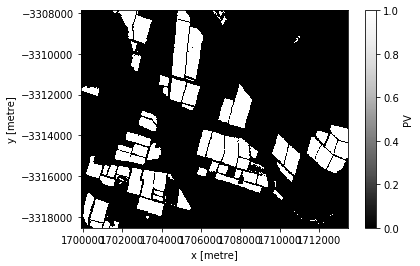

In [102]:
(land_std > 20).plot(cmap='Greys_r')

## Heading 2
Use markdown text for detailed, descriptive text explaining what the code below does and why it is needed.

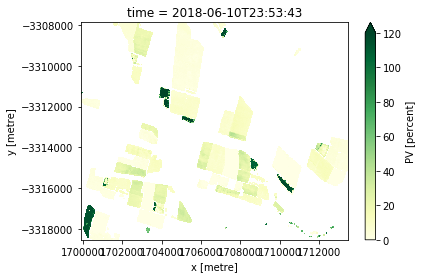

In [106]:
#plt.figure(figsize=(12,8))
fc_data.PV.where(land_std>20).isel(time=scene).plot(cmap='YlGn', vmax=120, vmin=0)
#ax1.set_title('PV croplands')

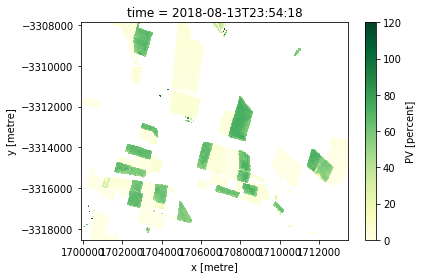

In [109]:
mean_error = fc_data.UE.mean(dim='time')

fc_data.PV.where(land_std>20).where(mean_error<=20.0).isel(time=2).plot(cmap='YlGn', vmax=120, vmin=0)
#ax1.set_title('PV croplands water filtered')

In [110]:
from ipywidgets import interactive

def plot_field(t):
    fc_data.PV.where(land_std>20).where(mean_error<=20.0).isel(time=t)\
    .plot(cmap='YlGn', vmax=120, vmin=0)

interactive_plot = interactive(plot_field, t=(0, fc_data.time.shape[0]-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot

interactive(children=(IntSlider(value=7, description='t', max=14), Output(layout=Layout(height='350px'))), _do…

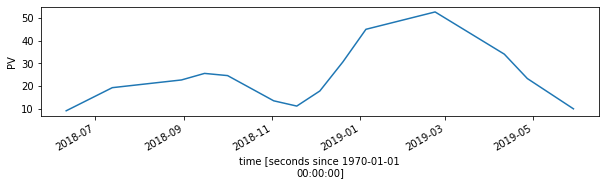

In [61]:
plt.figure(figsize=(10,2))
ds.PV.where(land_std>20).where(mean_error<=20.0).mean(dim=['x','y']).plot()

## Farm 2

In [113]:
query = {'lat': (-29.37, -29.45),
         'lon': (149.56, 149.68),
         'time':('2018-06-01', '2019-06-01')}

fc_data = dc_moree.load(product='ls8_fc_albers', **query)

# Cloud filtering functionality for FC is currently being developed so we manually filter cloudly images
fc_data = fc_data.isel(time=[0,1,4,5,8,9,10,11,12,13,14,15,20,21,24,25,26,27,31,32,33,34,35,40,41,44,45])

Shape: (419, 506)
Min: 0.000000, Max: 54.142727, Mean 10.751803


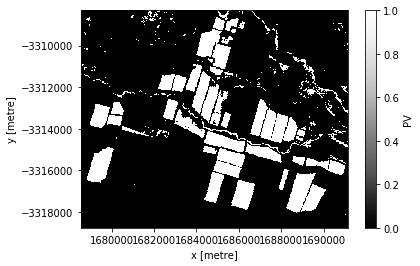

In [95]:
land_std = fc_data.PV.std(dim='time')
print("Shape:",land_std.shape)
print("Min: {:02f}, Max: {:02f}, Mean {:02f}".format(np.nanmin(land_std), np.nanmax(land_std), np.nanmean(land_std)))### Now we load and look at some data

(land_std > 20).plot(cmap='Greys_r')

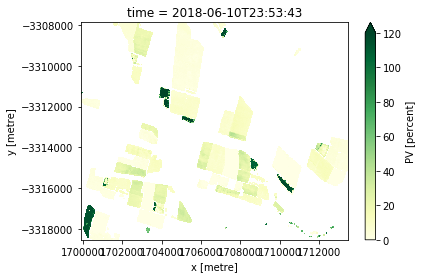

In [111]:
#plt.figure(figsize=(12,8))
scene = 0
fc_data.PV.where(land_std>20).isel(time=scene).plot(cmap='YlGn', vmax=120, vmin=0)
#ax1.set_title('PV croplands')

In [112]:
interactive_plot = interactive(plot_field, t=(0, fc_data.time.shape[0]-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot

interactive(children=(IntSlider(value=7, description='t', max=14), Output(layout=Layout(height='350px'))), _do…

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)